In [38]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [40]:
# Get the stock quote
from turtle import end_fill

# 'AAPL' - means apple stock
df = web.DataReader('AAPL', data_source='yahoo', start='2012-12-17', end='2022-08-30')

#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-17,18.571428,17.901072,18.176071,18.529642,757607200.0,15.961703
2012-12-18,19.103571,18.580357,18.750000,19.067858,625685200.0,16.425320
2012-12-19,19.060715,18.767857,18.981071,18.796785,449369200.0,16.191824
2012-12-20,18.935715,18.531429,18.928572,18.633215,481689600.0,16.050924
2012-12-21,18.559643,18.222857,18.302500,18.547501,596268400.0,15.977082
...,...,...,...,...,...,...
2022-08-24,168.110001,166.250000,167.320007,167.529999,53841500.0,167.529999
2022-08-25,170.139999,168.350006,168.779999,170.029999,51218200.0,170.029999
2022-08-26,171.050003,163.559998,170.570007,163.619995,78961000.0,163.619995


In [41]:
# Get the number of rows and columns 
df.shape

(2443, 6)

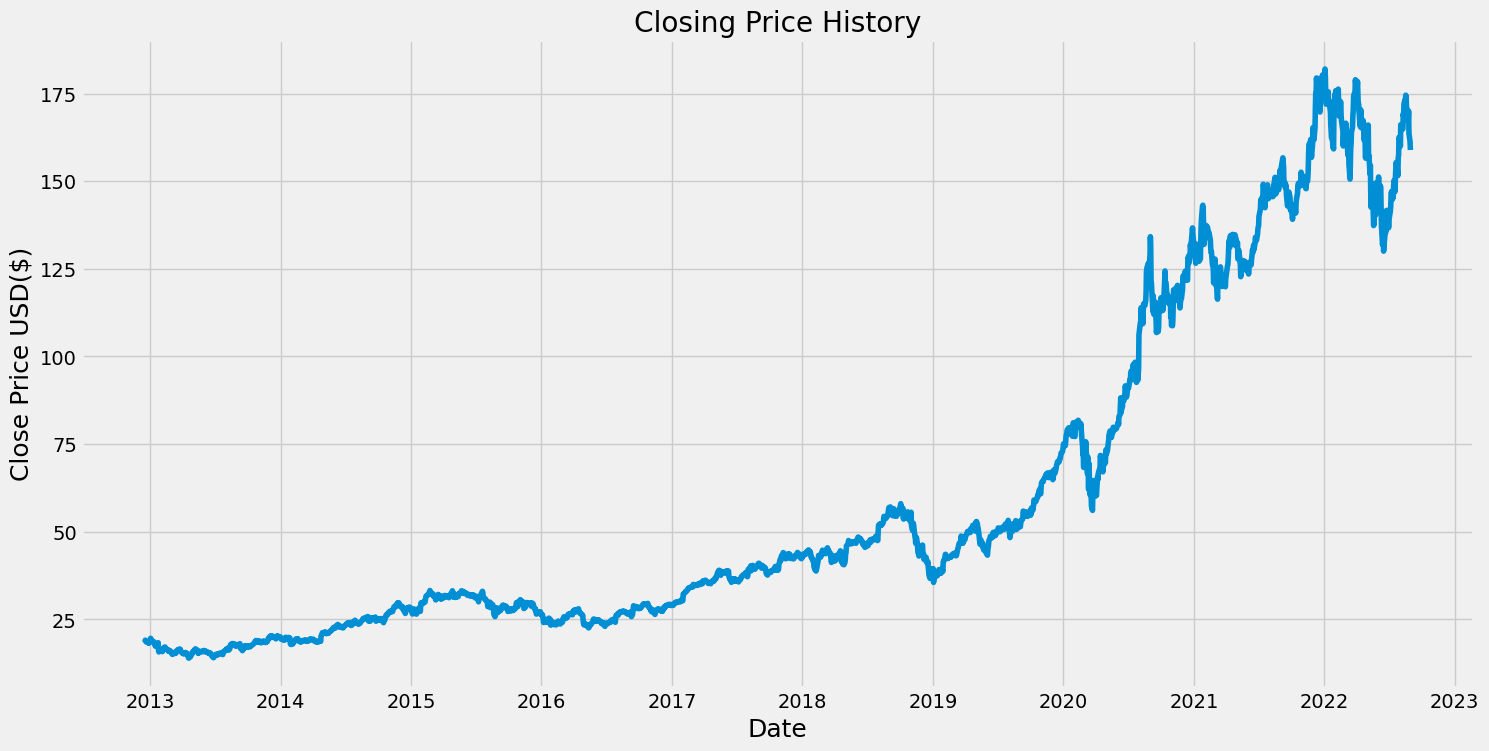

In [42]:
# Visualize the closing price history 
plt.figure(figsize=(16, 8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [43]:
# Create a new dataframe with only the close column 
data = df.filter(['Close'])

#Convert the dataframe to a numpy array 
dataset = data.values

#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

print(training_data_len)

1955


In [44]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02726451],
       [0.03046699],
       [0.02885406],
       ...,
       [0.89057642],
       [0.87724811],
       [0.86255118]])

In [45]:
# Create the training data set 

#Create the scaled training data set 

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 61:
        print(x_train)
        print(y_train)


[array([0.02726451, 0.03046699, 0.02885406, 0.02788079, 0.02737077,
       0.02754927, 0.0260256 , 0.02646337, 0.02530096, 0.03009934,
       0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.02326303, 0.02427668, 0.02624024,
       0.01274399, 0.01048717, 0.0126016 , 0.01439515, 0.01408915,
       0.01380439, 0.013407  , 0.01100568, 0.01430378, 0.01419965,
       0.01650959, 0.01794613, 0.01899803, 0.01644159, 0.01625246,
       0.01616321, 0.01479679, 0.01476066, 0.01239335, 0.01180045,
       0.01280986, 0.01110769, 0.01241885, 0.01148382, 0.01081018,
       0.00848749, 0.00627318, 0.00862986, 0.00746533, 0.00851086,
       0.00875312, 0.01006003, 0.00805397, 0.00803697, 0.00891888])]
[0.011290443155084609]
[array([0.02726451, 0.03046699, 0.02885406, 0.02788079, 0.02737077,
       0.02754927, 0.0260256 , 0.02646337, 0.02530096, 0.03009934,
       0.03368219, 0.03220953, 0.02

In [46]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [47]:
# Reshape the data to 3D(no of samples, no of time steps and the no of features)

# no of samples = no of rows (i.e. from x_train.shape)
# no of time steps = no of columns (i.e. from x_test.shape)
# no of features = no of features we want to use (in this case, we only want the 'Closing Price')
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1895, 60, 1)

In [48]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(Dense(25))
model.add(Dense(1))


In [49]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1895/1895 [==============================] - 67s 33ms/step - loss: 0.0020


In [72]:
#Create the testing data set
#Create a new array containing scaled values from index 1895 to 2003

test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test 
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])


In [74]:
# Convert the data to a numpy array 
x_test = np.array(x_test)
x_test.shape


(488, 60)

In [84]:
# Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(488, 60, 1)

In [85]:
# Get the models predicted price values
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions) # predictions should contain the same values as y_test dataset

16/16 [==============================] - 0s 20ms/step


ValueError: Found array with dim 3. None expected <= 2.

In [63]:
# Evaluate the model using the RMSE - Root Mean Square Error
rmse = np.sqrt( np.mean( predictions - y_test) ** 2)
rmse

ValueError: operands could not be broadcast together with shapes (488,60,1) (488,1) 

C:\Users\david\AppData\Local\Temp\ipykernel_30816\3409269927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


KeyError: ('Close', 'Predictions')

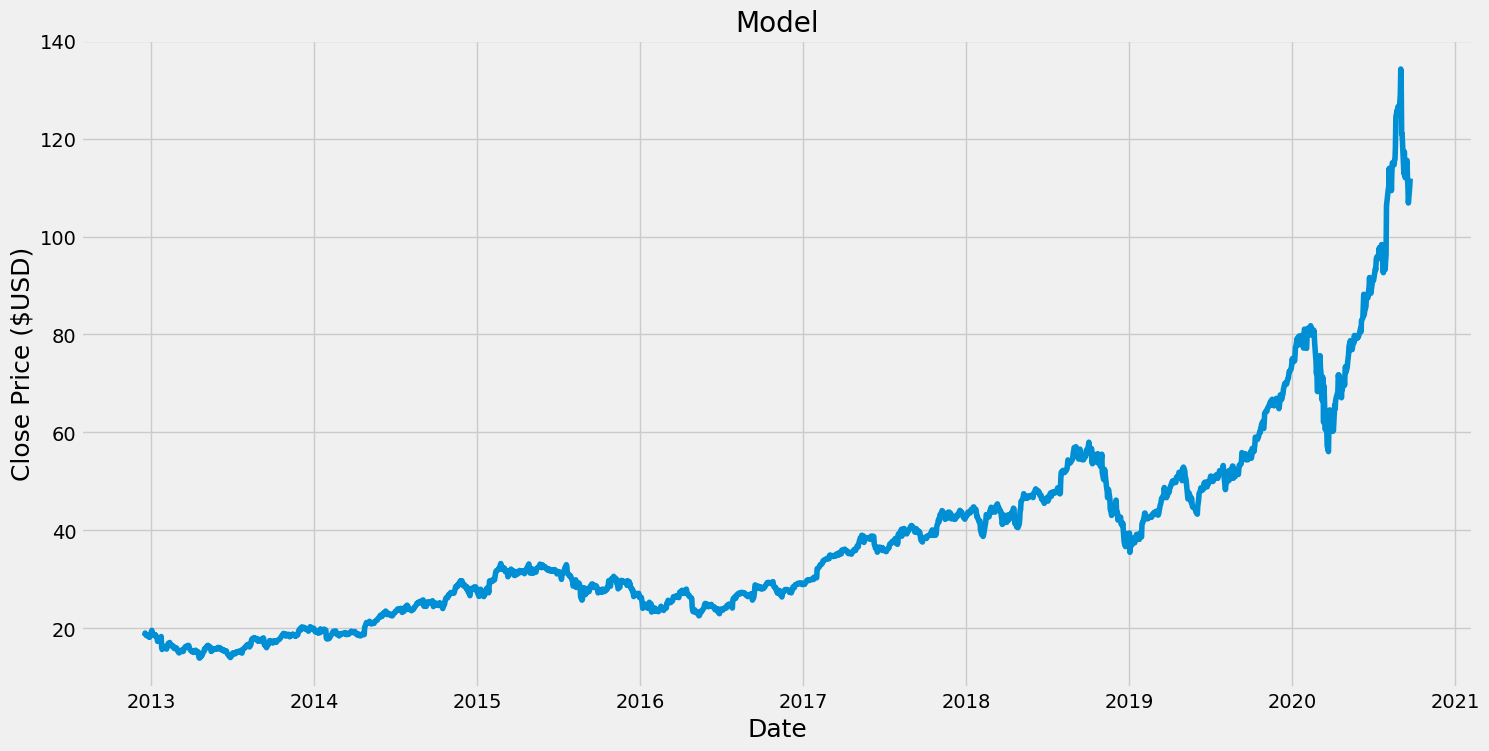

In [86]:
# Plot the data 
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(train['Close', 'Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [87]:
# Show the valid and predicted prices 
valid

ValueError: Shape of passed values is (2, 120, 1), indices imply (10, 2)

ValueError: Shape of passed values is (2, 120, 1), indices imply (10, 2)

In [89]:
# Try to predict stock price for a specific date 

apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

# Create a new DataFrame
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list 
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)

# Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# undo the scaling 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/AAPL/history?period1=1325386800&period2=1576637999&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000229C8075F30>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
# Verify the prediction by changing the end date to the next day
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-18')
print(apple_quote2['Close'])